# Volcanic Forcing on AMOC Transitions - Figure 3

This notebook generates a comprehensive multi-panel figure analyzing the impact of volcanic forcing on Atlantic Meridional Overturning Circulation (AMOC) transitions in a complex climate model. The analysis examines how volcanic events affect AMOC stability at different climate states.

## Figure Structure

**LEFT SIDE (Interstadial Age Test):**
- **Panel A**: Overview showing AMOC ensemble with three zoom regions at different interstadial ages
- **Panels B, C, D**: Detailed zoom views showing 50-member ensembles at three different interstadial ages:
  - Panel B: Younger interstadial state
  - Panel C: Mid-age interstadial state  
  - Panel D: Older interstadial state (closer to stadial transition)

**RIGHT SIDE (Stadial Age Test):**
- **Panel E**: Overview showing AMOC ensemble with three zoom regions at different stadial ages
- **Panels F, G, H**: Detailed zoom views showing 50-member ensembles at three different stadial ages:
  - Panel F: Earlier in stadial period
  - Panel G: Mid-stadial period
  - Panel H: Later in stadial period (closer to interstadial transition)

## Key Features in Each Zoom Panel

Each zoom panel (B-D and F-H) includes:
- **50 ensemble members** comparing:
  - Blue lines: Noise-only ensemble (no volcanic forcing)
  - Red lines: Volcanic ensemble (with volcanic forcing at specified time)
- **Histogram inset** showing final AMOC state distribution
- **Transition probabilities** calculated as percentage of ensemble members transitioning below basin boundary threshold
- **Basin boundary** marked as green shaded region (critical threshold for AMOC state transitions)
- **Volcanic event timing** indicated by red vertical line and annotation

## Scientific Context

The analysis tests the hypothesis that volcanic forcing can trigger AMOC transitions, and that the effectiveness depends on:
1. **Climate state age**: Proximity to natural transition threshold
2. **Background state**: Whether system is in interstadial (warm) or stadial (cold) state

Results show volcanic forcing is most effective at triggering transitions when the climate system is already close to a natural tipping point.

In [34]:
# Import required libraries for data processing, visualization, and climate data analysis
# - cftime: Handle non-standard calendars used in climate models
# - xarray: Work with multi-dimensional labeled arrays (NetCDF data)
# - matplotlib/seaborn: Create publication-quality figures
# - pandas/numpy: Data manipulation and numerical operations

import datetime
import datetime as dt
import glob

import cftime
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns
from typing import Union, List

import xarray as xr
from xclim import ensembles

from matplotlib.patches import Rectangle#from scipy.integrate import trapz

In [35]:
def setaxesfsize(axl, fontsize):
    """
    Set font size for tick labels on x and y axes of a given matplotlib axis object.

    Parameters:
    axl (matplotlib.axes.Axes): The axis object to modify.
    fontsize (int): The desired font size for the tick labels.

    Returns:
    None
    """
    ticklabelbot = axl.get_xticklabels()
    ticklabelleft = axl.get_yticklabels()

    for labelx in ticklabelbot:
        labelx.set_fontsize(fontsize)

    for labely in ticklabelleft:
        labely.set_fontsize(fontsize)

In [37]:
# Configure time decoder for climate model data
# Creates a CFDatetimeCoder instance to properly decode time coordinates from NetCDF files
# using cftime (handles non-standard calendars like 'noleap' used in climate models)

time_coder = xr.coders.CFDatetimeCoder(use_cftime=True)
time_coder

In [38]:
def load_dataset(filename: str) -> Union[xr.DataArray, None]:
    """
    Load a dataset from a NetCDF file.

    Args:
        filename (str): The name of the NetCDF file to load.

    Returns:
        xr.DataArray: The loaded and processed dataset.
        None: If there was an error loading the file.

    Raises:
        FileNotFoundError: If the specified file does not exist.
    """
    try:
        dataset = xr.load_dataset(filename, decode_times=time_coder)
        return dataset.to_dataarray().rename('MOC').drop_vars('variable').squeeze()
    except FileNotFoundError:
        print(f"Error: File '{filename}' not found.")
        return None
    except Exception as e:
        print(f"Error loading dataset: {str(e)}")
        return None


In [39]:
def calculate_mean_last10yr(data: xr.DataArray, nruns: int, t_from: int = -72, t_to: int = -60, endmon: int = -1) -> np.ndarray:
    """
    Calculate the mean of the last 10 years for each ensemble member.

    Args:
        data (xr.DataArray): The input data array.
        nruns (int): The number of ensemble runs.
        t_from (int, optional): Start index for time slice. Defaults to -72.
        t_to (int, optional): End index for time slice. Defaults to -60.
        endmon (int, optional): End month for data selection. Defaults to -1.

    Returns:
        np.ndarray: Array of mean values for the last 10 years of each ensemble member.

    Raises:
        ValueError: If nruns is less than or equal to 0.
    """
    if nruns <= 0:
        raise ValueError("Number of runs (nruns) must be greater than 0.")

    try:
        return np.array([
            data[i][0:endmon].isel(time=slice(t_from, t_to)).mean(dim="time").values
            for i in range(nruns)
        ])
    except Exception as e:
        print(f"Error calculating mean: {str(e)}")
        return np.array([])


In [40]:
# Load ensemble data from NetCDF files
# This cell loads AMOC maximum strength data (10-year running mean) for multiple experiments:
# - ctrl230i: Control run (no volcanic forcing)
# - ens_eq_no*: Noise-only ensembles at different model years (3701, 6701, 7701, 8501, 8701, 8901)
# - ens_eq_*: Volcanic forcing ensembles at corresponding years
# Each ensemble contains 50 members comparing volcanic vs. noise-only scenarios

root_dir = '/home/guido/Dropbox/ipynb/D-O_analysis/volcanic/'

# Load each variable separately from its corresponding NetCDF file
ctrl230i_moc_max_rm10a = load_dataset(root_dir + 'ctrl230i_moc_max_rm10a.nc')

ens_eq_no3701_moc_max_rm10a = load_dataset(root_dir + 'ens_eq_no3701_moc_max_rm10a.nc')
ensmean_eq_no3701_moc_max_rm10a = load_dataset(root_dir + 'ensmean_eq_no3701_moc_max_rm10a.nc')
ens_eq_no6701_moc_max_rm10a = load_dataset(root_dir + 'ens_eq_no6701_moc_max_rm10a.nc')
ensmean_eq_no6701_moc_max_rm10a = load_dataset(root_dir + 'ensmean_eq_no6701_moc_max_rm10a.nc')
ens_eq_no7701_moc_max_rm10a = load_dataset(root_dir + 'ens_eq_no7701_moc_max_rm10a.nc')
ensmean_eq_no7701_moc_max_rm10a = load_dataset(root_dir + 'ensmean_eq_no7701_moc_max_rm10a.nc')

ens_eq_3701_moc_max_rm10a = load_dataset(root_dir + 'ens_eq_3701_moc_max_rm10a.nc')
ensmean_eq_3701_moc_max_rm10a = load_dataset(root_dir + 'ensmean_eq_3701_moc_max_rm10a.nc')
ens_eq_6701_moc_max_rm10a = load_dataset(root_dir + 'ens_eq_6701_moc_max_rm10a.nc')
ensmean_eq_6701_moc_max_rm10a = load_dataset(root_dir + 'ensmean_eq_6701_moc_max_rm10a.nc')
ens_eq_7701_moc_max_rm10a = load_dataset(root_dir + 'ens_eq_7701_moc_max_rm10a.nc')
ensmean_eq_7701_moc_max_rm10a = load_dataset(root_dir + 'ensmean_eq_7701_moc_max_rm10a.nc')

ens_eq_no8501_moc_max_rm10a = load_dataset(root_dir + 'ens_eq_no8501_moc_max_rm10a.nc')
ensmean_eq_no8501_moc_max_rm10a = load_dataset(root_dir + 'ensmean_eq_no8501_moc_max_rm10a.nc')
ens_eq_no8701_moc_max_rm10a = load_dataset(root_dir + 'ens_eq_no8701_moc_max_rm10a.nc')
ensmean_eq_no8701_moc_max_rm10a = load_dataset(root_dir + 'ensmean_eq_no8701_moc_max_rm10a.nc')
ens_eq_no8901_moc_max_rm10a = load_dataset(root_dir + 'ens_eq_no8901_moc_max_rm10a.nc')
ensmean_eq_no8901_moc_max_rm10a = load_dataset(root_dir + 'ensmean_eq_no8901_moc_max_rm10a.nc')

ensmean_eq_8901_moc_max_rm10a = load_dataset(root_dir + 'ensmean_eq_8901_moc_max_rm10a.nc')

ens_eq_8501_moc_max_rm10a = load_dataset(root_dir + 'ens_eq_8501_moc_max_rm10a.nc')
ens_eq_8901_moc_max_rm10a = load_dataset(root_dir + 'ens_eq_8901_moc_max_rm10a.nc')

ensmean_eq_8501_moc_max_rm10a = load_dataset(root_dir + 'ensmean_eq_8501_moc_max_rm10a.nc')
ensmean_eq_8701_moc_max_rm10a = load_dataset(root_dir + 'ensmean_eq_8701_moc_max_rm10a.nc')
ens_eq_8701_moc_max_rm10a = load_dataset(root_dir + 'ens_eq_8701_moc_max_rm10a.nc')

In [41]:
# Define number of ensemble members for each experiment
# All experiments use 50-member ensembles to ensure robust statistics
# for transition probability calculations

nruns_3701 = 50
nruns_6701 = 50
nruns_7701 = 50
nruns_8901 = 50
nruns_8501 = 50
nruns_8701 = 50

In [42]:
# Calculate final AMOC state for each ensemble member
# Computes the mean AMOC strength over the last 10 years of each simulation
# This is used to determine if a transition occurred (below basin boundary threshold)
# and to create histogram distributions showing final states

ens_eq_no3701_moc_max_mean_last10yr = calculate_mean_last10yr(ens_eq_no3701_moc_max_rm10a, nruns_3701)
ens_eq_3701_moc_max_mean_last10yr = calculate_mean_last10yr(ens_eq_3701_moc_max_rm10a, nruns_3701)

ens_eq_no6701_moc_max_mean_last10yr = calculate_mean_last10yr(ens_eq_no6701_moc_max_rm10a, nruns_6701)
ens_eq_6701_moc_max_mean_last10yr = calculate_mean_last10yr(ens_eq_6701_moc_max_rm10a, nruns_6701)

ens_eq_no7701_moc_max_mean_last10yr = calculate_mean_last10yr(ens_eq_no7701_moc_max_rm10a, nruns_7701)
ens_eq_7701_moc_max_mean_last10yr = calculate_mean_last10yr(ens_eq_7701_moc_max_rm10a, nruns_7701)

ens_eq_no8501_moc_max_mean_last10yr = calculate_mean_last10yr(ens_eq_no8501_moc_max_rm10a, nruns_8501)
ens_eq_8501_moc_max_mean_last10yr = calculate_mean_last10yr(ens_eq_8501_moc_max_rm10a, nruns_8501)

ens_eq_no8701_moc_max_mean_last10yr = calculate_mean_last10yr(ens_eq_no8701_moc_max_rm10a, nruns_8701)

ens_eq_8701_moc_max_mean_last10yr = calculate_mean_last10yr(ens_eq_8701_moc_max_rm10a, nruns_8701)

ens_eq_8901_moc_max_mean_last10yr = calculate_mean_last10yr(ens_eq_8901_moc_max_rm10a, nruns_8901)
ens_eq_no8901_moc_max_mean_last10yr = calculate_mean_last10yr(ens_eq_no8901_moc_max_rm10a, nruns_8901)

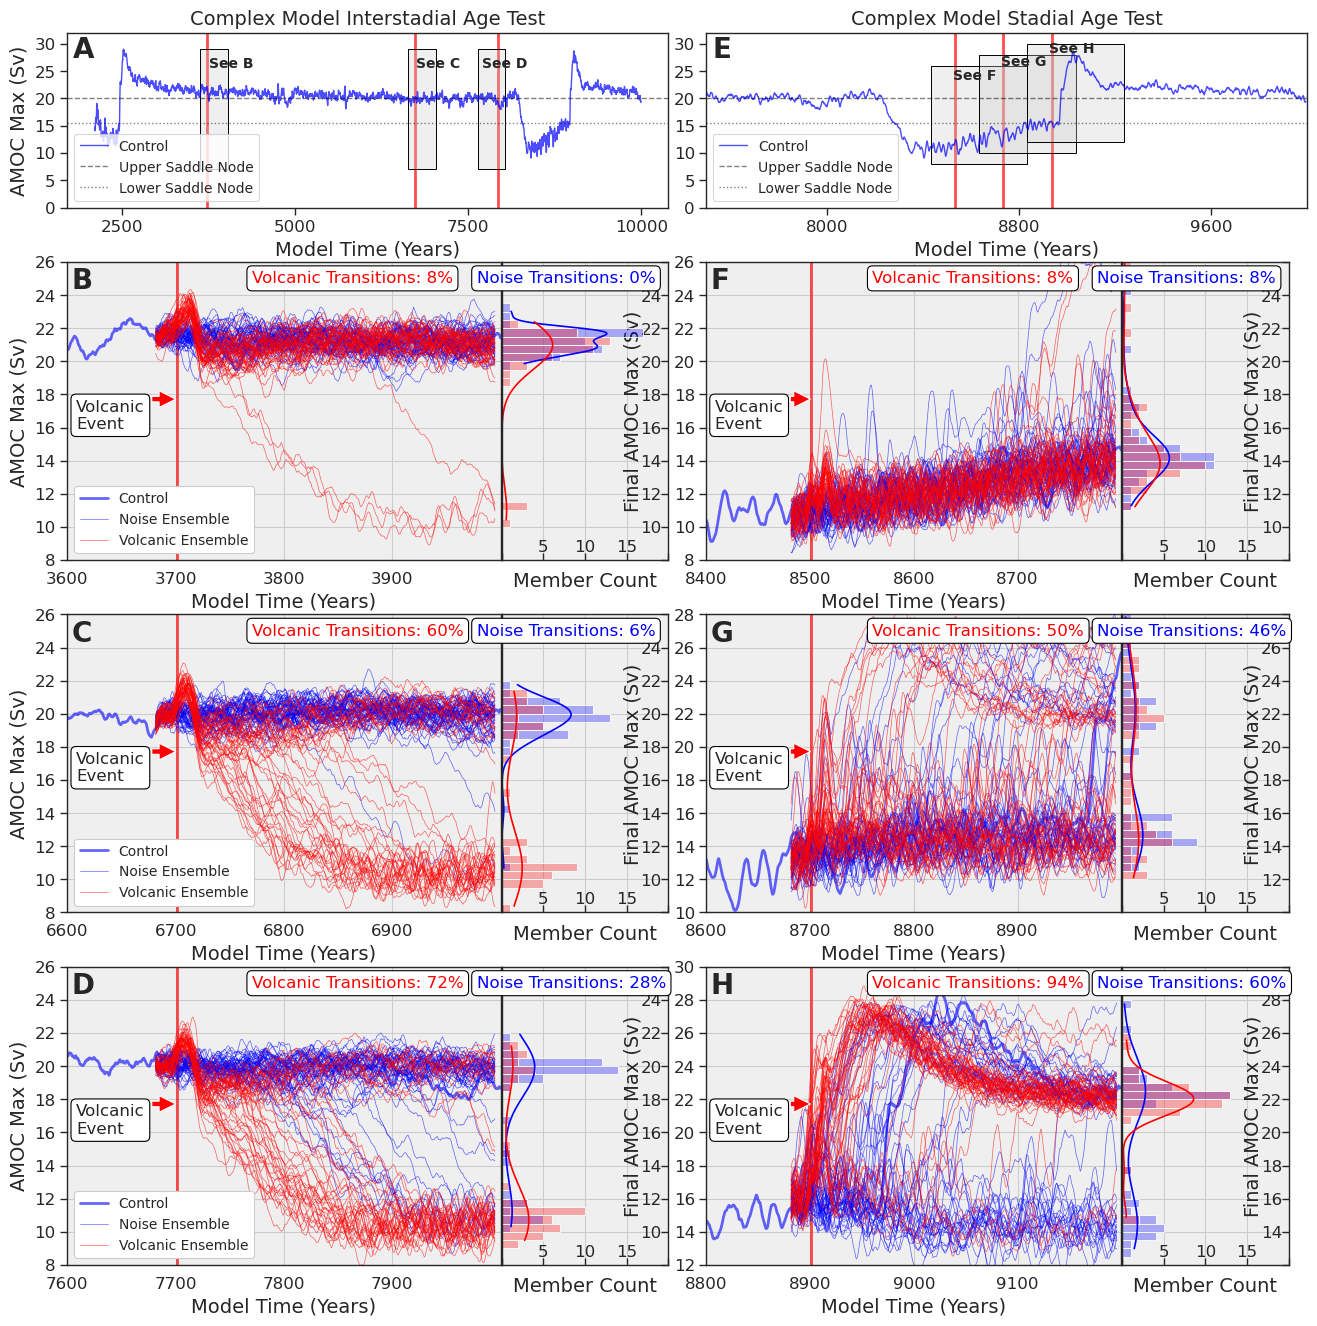

In [44]:
# Create main figure with multi-panel layout
# This cell sets up the complete Figure 3 structure using matplotlib gridspec:
# - 140×200 grid allows precise control of subplot positioning
# - Left side (panels A-D): Interstadial age test at years 3701, 6701, 7701
# - Right side (panels E-H): Stadial age test at years 8501, 8701, 8901
# - Each side has overview plot + 3 zoom panels with histogram insets

#### Equatorial
fig = plt.figure(figsize=(16, 16))

# set the style
sns.set_style("ticks")
sns.set_context("paper")

zoomcolor = (
    0.8,
    0.8,
    0.8,
    0.3,
)  # lightgray with 0.3 transparency, we are going to zoom out this area

# Create a 1x6 grid (this can be adjusted based on your needs)
gs = gridspec.GridSpec(140, 200)

# Three horizontal axes spanning the entire width
zoomcolor = (0.8, 0.8, 0.8, 0.3)  # lightgray with 0.3 transparency, we are going to zoom out this area
tlmid = 97
trmid = 103
ax0 = fig.add_subplot(gs[0:20, :tlmid])
ax1 = fig.add_subplot(gs[26:60, 0:70], facecolor=zoomcolor)
axins1 = fig.add_subplot(gs[26:60, 70:tlmid], facecolor=zoomcolor)
ax2 = fig.add_subplot(gs[66:100, 0:70], facecolor=zoomcolor)
axins2 = fig.add_subplot(gs[66:100, 70:tlmid], facecolor=zoomcolor)
ax3 = fig.add_subplot(gs[106:140, 0:70], facecolor=zoomcolor)
axins3 = fig.add_subplot(gs[106:140, 70:tlmid], facecolor=zoomcolor)

# Duplicate axes on the right
ax0_dup = fig.add_subplot(gs[0:20, trmid:])
ax1_dup = fig.add_subplot(gs[26:60, trmid:170], facecolor=zoomcolor)
axins1_dup = fig.add_subplot(gs[26:60, 170:197], facecolor=zoomcolor)
ax2_dup = fig.add_subplot(gs[66:100, trmid:170], facecolor=zoomcolor)
axins2_dup = fig.add_subplot(gs[66:100, 170:197], facecolor=zoomcolor)
ax3_dup = fig.add_subplot(gs[106:140, trmid:170], facecolor=zoomcolor)
axins3_dup = fig.add_subplot(gs[106:140, 170:197], facecolor=zoomcolor)

ax = [ax0, ax1, axins1, ax2, axins2, ax3, axins3, ax0_dup, ax1_dup, axins1_dup, ax2_dup, axins2_dup, ax3_dup, axins3_dup]

##############################


##### Top Left  ##################################################################################
################## Main Plot
lw = 1.5
lalp = 0.7
ax0ymax = 32
ax0ymin = 0
axlbls = 14  # axes label size
axts = 12  # axes tick label size
# v2601 = cftime.num2date(2601*365, 'days since 0000-01-01 00:00:00', calendar='noleap')
# ax0.vlines(v2601,ax0ymin,ax0ymax, color='red', alpha=0.7, linewidths=2.0, zorder=1)
#vgrid0 = [yr * 365 for yr in range(2701, 10000, 1000)]
#[
#    ax0.vlines(
#        vgrid0[i], ax0ymin, ax0ymax, color="red", alpha=0.7, linewidths=2.0, zorder=1
#    )
#    for i in [1,4,5]
#]
vgrid0 = [
    cftime.num2date(yr * 365, "days since 0000-01-01 00:00:00", calendar="noleap")
    for yr in [3701, 6701, 7901]
]

[
    ax0.vlines(
        mdates.date2num(vgrid0[i]), ax0ymin, ax0ymax, color="red", alpha=0.7, linewidths=2.0, zorder=1
    )
    for i in [0,1,2]
]

# put in boxes for warm to cold and cold to warm transition probability study
# Create a rectangle starting from the 1st date to the 2nd date

################ these are the insets that we will zoom in on
xzoom1_start = 3601
xzoom1_end = 4001
xzoom2_start = 6601
xzoom2_end = 7001
xzoom3_start = 7601
xzoom3_end = 8001
##############################

# Create a rectangle starting from the 1st date to the 2nd date
boxdates1_start = mdates.date2num(cftime.num2date(xzoom1_start * 365, "days since 0000-01-01 00:00:00", calendar="noleap"))
boxdates1_end = mdates.date2num(cftime.num2date(xzoom1_end * 365, "days since 0000-01-01 00:00:00", calendar="noleap"))

# add the grey rectangles of interest for zoom plots
rect_width = boxdates1_end - boxdates1_start
rectxmin = 7
rectxmax = 29
rect_height = rectxmax - rectxmin
rect = Rectangle(
    (boxdates1_start, rectxmin),
    width=rect_width,
    height=rect_height,
    color=zoomcolor,
)
border = Rectangle(
    (boxdates1_start, rectxmin),
    width=rect_width,
    height=rect_height,
    facecolor="none",
    edgecolor="black",
    linewidth=0.7,
)
ax0.add_patch(rect)
ax0.add_patch(border)

# Create a rectangle starting from the 1st date to the 2nd date
boxdates2_start = mdates.date2num(cftime.num2date(xzoom2_start * 365, "days since 0000-01-01 00:00:00", calendar="noleap"))
boxdates2_end = mdates.date2num(cftime.num2date(xzoom2_end * 365, "days since 0000-01-01 00:00:00", calendar="noleap"))
rect_width = boxdates2_end - boxdates2_start
rectxmin = 7
rectxmax = 29
rect_height = rectxmax - rectxmin
rect = Rectangle(
    (boxdates2_start, rectxmin),
    width=rect_width,
    height=rect_height,
    color=zoomcolor,
)
border = Rectangle(
    (boxdates2_start, rectxmin),
    width=rect_width,
    height=rect_height,
    facecolor="none",
    edgecolor="black",
    linewidth=0.7,
)
ax0.add_patch(rect)
ax0.add_patch(border)

# Create a rectangle starting from the 1st date to the 2nd date
boxdates3_start = mdates.date2num(cftime.num2date(xzoom3_start * 365, "days since 0000-01-01 00:00:00", calendar="noleap"))
boxdates3_end = mdates.date2num(cftime.num2date(xzoom3_end * 365, "days since 0000-01-01 00:00:00", calendar="noleap"))
rect_width = boxdates3_end - boxdates3_start
rectxmin = 7
rectxmax = 29
rect_height = rectxmax - rectxmin
rect = Rectangle(
    (boxdates3_start, rectxmin),
    width=rect_width,
    height=rect_height,
    color=zoomcolor,
)
border = Rectangle(
    (boxdates3_start, rectxmin),
    width=rect_width,
    height=rect_height,
    facecolor="none",
    edgecolor="black",
    linewidth=0.7,
)
ax0.add_patch(rect)
ax0.add_patch(border)


cntcol = "black"
cntalp = 0.5
# volcanic run colors
vcols = ["purple", "blue", "red"]
# eruption colors
ecols = ["magenta", "cyan", "orange"]

ctrl230i_moc_max_rm10a.plot(
    ax=ax0,
    color="blue",
    linewidth=1.0,
    alpha=0.7,
    label="Control",
)
ax0.axhline(
    20,
    0,
    1,
    color="k",
    alpha=0.5,
    linewidth=1.0,
    linestyle="dashed",
    label="Upper Saddle Node",
)
ax0.axhline(
    15.5,
    0,
    1,
    color="k",
    alpha=0.5,
    linewidth=1.0,
    linestyle="dotted",
    label="Lower Saddle Node",
)

ax0.set_ylabel("AMOC Max (Sv)", size=axlbls)
ax0.set_xlabel("Model Time (Years)", size=axlbls)
# ax0.grid()
# ax0.set_title("Volcanic Test", size=16, loc='center')
ax0.set_title("", size=16, loc="center")
ax0.set_ylim(ax0ymin, ax0ymax)
setaxesfsize(ax0, axts)
ax0.legend(loc=3, fontsize=10, ncol=1)

##### Top Right  ##################################################################################

xinmin = 0
xinmax = 18
#ealp = 0.8 # transparency of ensemble runs
################## Main Plot
lw = 1.5
lalp = 0.7
ax0ymax = 32
ax0ymin = 0
axlbls = 14  # axes label size
axts = 12  # axes tick label size
# v2601 = cftime.num2date(2601*365, 'days since 0000-01-01 00:00:00', calendar='noleap')
# ax0.vlines(v2601,ax0ymin,ax0ymax, color='red', alpha=0.7, linewidths=2.0, zorder=1)
vgrid0_dup = [
    cftime.num2date(yr * 365, "days since 0000-01-01 00:00:00", calendar="noleap")
    for yr in [8501, 8701, 8901]
]

[
    ax0_dup.vlines(
        mdates.date2num(vgrid0_dup[i]), ax0ymin, ax0ymax, color="red", alpha=0.7, linewidths=2.0, zorder=1
    )
    for i in [0,1,2]
]


# put in boxes for warm to cold and cold to warm transition probability study
# Create a rectangle starting from the 1st date to the 2nd date

################ these are the insets that we will zoom in on
xzoom1_dup_start = 8401
xzoom1_dup_end = 8801
xzoom2_dup_start = 8601
xzoom2_dup_end = 9001
xzoom3_dup_start = 8801
xzoom3_dup_end = 9201
##############################
endmon = -1
##############################

# Create a rectangle starting from the 1st date to the 2nd date
boxdates1_dup_start = mdates.date2num(cftime.num2date(xzoom1_dup_start * 365, "days since 0000-01-01 00:00:00", calendar="noleap"))
boxdates1_dup_end = mdates.date2num(cftime.num2date(xzoom1_dup_end * 365, "days since 0000-01-01 00:00:00", calendar="noleap"))
rect_width = boxdates1_dup_end - boxdates1_dup_start
rectxmin = 8
rectxmax = 26
rect_height = rectxmax - rectxmin
rect = Rectangle(
    (boxdates1_dup_start, rectxmin),
    width=rect_width,
    height=rect_height,
    color=zoomcolor,
)
border = Rectangle(
    (boxdates1_dup_start, rectxmin),
    width=rect_width,
    height=rect_height,
    facecolor="none",
    edgecolor="black",
    linewidth=0.7,
)
ax0_dup.add_patch(rect)
ax0_dup.add_patch(border)

# Create a rectangle starting from the 1st date to the 2nd date
boxdates2_dup_start = mdates.date2num(cftime.num2date(xzoom2_dup_start * 365, "days since 0000-01-01 00:00:00", calendar="noleap"))
boxdates2_dup_end = mdates.date2num(cftime.num2date(xzoom2_dup_end * 365, "days since 0000-01-01 00:00:00", calendar="noleap"))
rect_width = boxdates2_dup_end - boxdates2_dup_start
rectxmin = 10
rectxmax = 28
rect_height = rectxmax - rectxmin
rect = Rectangle(
    (boxdates2_dup_start, rectxmin),
    width=rect_width,
    height=rect_height,
    color=zoomcolor,
)
border = Rectangle(
    (boxdates2_dup_start, rectxmin),
    width=rect_width,
    height=rect_height,
    facecolor="none",
    edgecolor="black",
    linewidth=0.7,
)
ax0_dup.add_patch(rect)
ax0_dup.add_patch(border)

# Create a rectangle starting from the 1st date to the 2nd date
boxdates3_dup_start = mdates.date2num(cftime.num2date(xzoom3_dup_start * 365, "days since 0000-01-01 00:00:00", calendar="noleap"))
boxdates3_dup_end = mdates.date2num(cftime.num2date(xzoom3_dup_end * 365, "days since 0000-01-01 00:00:00", calendar="noleap"))
rect_width = boxdates3_dup_end - boxdates3_dup_start
rectxmin = 12
rectxmax = 30
rect_height = rectxmax - rectxmin
rect = Rectangle(
    (boxdates3_dup_start, rectxmin),
    width=rect_width,
    height=rect_height,
    color=zoomcolor,
)
border = Rectangle(
    (boxdates3_dup_start, rectxmin),
    width=rect_width,
    height=rect_height,
    facecolor="none",
    edgecolor="black",
    linewidth=0.7,
)
ax0_dup.add_patch(rect)
ax0_dup.add_patch(border)


cntcol = "black"
cntalp = 0.5
# volcanic run colors
vcols = ["purple", "blue", "red"]
# eruption colors
ecols = ["magenta", "cyan", "orange"]

ctrl230i_moc_max_rm10a.plot(
    ax=ax0_dup,
    color="blue",
    linewidth=1.0,
    alpha=0.7,
    label="Control",
)
#zoom in to later half of control simulation
ax0_dup.set_xlim(cftime.num2date(
        7500 * 365, "days since 0000-01-01 00:00:00", calendar="noleap"
    ),
                 cftime.num2date(
        10000 * 365, "days since 0000-01-01 00:00:00", calendar="noleap"
    ))
ax0_dup.axhline(
    20,
    0,
    1,
    color="k",
    alpha=0.5,
    linewidth=1.0,
    linestyle="dashed",
    label="Upper Saddle Node",
)
ax0_dup.axhline(
    15.5,
    0,
    1,
    color="k",
    alpha=0.5,
    linewidth=1.0,
    linestyle="dotted",
    label="Lower Saddle Node",
)

#ax0_dup.set_ylabel("AMOC Max (Sv)", size=axlbls)
#ax0_dup.set_xlabel("Model Time (Years)", size=axlbls)
ax0_dup.set_ylabel("", size=axlbls)
ax0_dup.set_xlabel("Model Time (Years)", size=axlbls)
# ax0_dup.grid()
# ax0_dup.set_title("Volcanic Test", size=16, loc='center')
ax0_dup.set_title("", size=16, loc="center")
ax0_dup.set_ylim(ax0ymin, ax0ymax)
setaxesfsize(ax0_dup, axts)
ax0_dup.legend(loc=3, fontsize=10, ncol=1)

# But turn off the y-axis labels and ticks
#ax0_dup.set_yticklabels([])
#ax0_dup.set_yticks([])
#ax0_dup.set_ylabel("")


################################## Zoom Plots ##################################################
# for position of "Volcanic Event" text label 
vitfont = 12
nitfont = 12


vlabxy = (0.254, 0.54)
vlabxyt = (0.02, 0.54)

######################################################
################## Zoom Plot1 ########################
sns.set_style("darkgrid")

esalp = 0.6  # ensemble line transparency
esmalp = 0.9  # ensemble mean line tranparency
eslw = 0.5  # ensemble line width
esmlw = 2.0  # ensemble mean line width
origlw = 2.0  # original runs line width

# original lines
ctrl230i_moc_max_rm10a.plot(
    ax=ax1,
    color="blue",
    linewidth=origlw,
    alpha=esalp,
    label="Control",
)
#eq_v1000_moc_max_rm10a.plot(
#    ax=ax1,
#    color="red",
#    linewidth=origlw,
#    alpha=esalp,
#    label="CO$_2$ = 230ppm (Periodic EQ 500Tg SO$_4$)",
#)
# esemble member zero , for figure label
ens_eq_no3701_moc_max_rm10a[0][0:endmon].plot(
    ax=ax1,
    color="blue",
    linewidth=eslw,
    alpha=esalp,
    label="Noise Ensemble",
)
ens_eq_3701_moc_max_rm10a[0][0:endmon].plot(
    ax=ax1,
    color="red",
    linewidth=eslw,
    alpha=esalp,
    label="Volcanic Ensemble"
)
# other esemble members
[
    ens_eq_no3701_moc_max_rm10a[i][0:endmon].plot(
        ax=ax1, color="blue", linewidth=eslw, alpha=esalp
    )
    for i in range(1, nruns_3701)
]
[
    ens_eq_3701_moc_max_rm10a[i][0:endmon].plot(
        ax=ax1, color="red", linewidth=eslw, alpha=esalp)
    for i in range(1, nruns_3701)
]

#ensmean_eq_no3701_moc_max_rm10a.plot(
#    ax=ax1,
#    color="cyan",
#    linewidth=esmlw,
#    alpha=esmalp,
#    label="Noise (Ens Mean)",
#)
#ensmean_eq_3701_moc_max_rm10a.plot(
#    ax=ax1,
#    color="yellow",
#    linewidth=esmlw,
#    alpha=esmalp,
#    label="Volc (Ens Mean)",
#)

# Volcano at 3701 line
eq_v3701 = cftime.num2date(
    3701 * 365, "days since 0000-01-01 00:00:00", calendar="noleap"
)
ymin = 8
ymax = 26
ax1.vlines(eq_v3701, ymin, ymax, color="red", alpha=0.7, linewidths=2.0, zorder=1)
setaxesfsize(ax1, axts)
ax1.set_xlabel("Model Time (Years)", size=axlbls)
ax1.set_ylabel("AMOC Max (Sv)", size=axlbls)
ax1.set_ylim(ymin, ymax)
#xmin = cftime.num2date(
#    xzoom1_start * 365, "days since 0000-01-01 00:00:00", calendar="noleap"
#)
#xmax = cftime.num2date(
#    xzoom1_end * 365, "days since 0000-01-01 00:00:00", calendar="noleap"
#)
# need to offset so it ends at 6000
xminval = 3600
xmaxval = 4000
xmin = cftime.num2date(
    xminval * 365, "days since 0000-01-01 00:00:00", calendar="noleap"
)
xmax = cftime.num2date(
    xmaxval * 365, "days since 0000-01-01 00:00:00", calendar="noleap"
)
ax1.set_xlim(xmin, xmax)

# Fix the ticks and tick labels to make it look like inset is a separate plot
# Fetch current x-tick labels from outer plot
xticks = ax1.get_xticks()
labels = [item.get_text() for item in ax1.get_xticklabels()]
# Check if there are enough tick labels to modify
if len(labels) > 1:
    # labels[0] = ''
    # Remove first label
    labels[-1] = ""
    # Remove last label
# Set new labels
ax1.set_xticks(xticks)
ax1.set_xticklabels(labels)
# just to compare the same yaxis and make sure the histogram is right
ax1.grid()

vefc='#ffffff'
vealp=1.0
ax1.legend(loc=3, fontsize=10, facecolor=vefc, framealpha=vealp)
ax1.annotate('Volcanic\nEvent',
             xy=vlabxy, xycoords='axes fraction',
             xytext=vlabxyt, textcoords='axes fraction',
             arrowprops=dict(facecolor='red', shrink=0.05),
             horizontalalignment='left', verticalalignment='top',
             size=12,
             bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor=vefc, alpha=vealp))

ax1.tick_params(bottom=False, right=False)

ax1.set_title("")


####### INSET
# Create the inset axes, choosing a position and size manually
# The parameters are [left, bottom, width, height] in the figure’s coordinate system
# inset axes....
# change this to its own gridpsect now
#axins1 = ax1.inset_axes([0.75, 0.0, 0.25, 1.0])
x1, x2, y1, y2 = 0, 20, ymin, ymax
axins1.set_xlim(x1, x2)
axins1.set_ylim(y1, y2)

bwidth = 0.5
sns.histplot(
    ax=axins1,
    y=ens_eq_no3701_moc_max_mean_last10yr,
    kde=True,
    orientation="vertical",
    binwidth=bwidth,
    binrange=[ymin, ymax],
    color="blue",
    alpha=0.3,
    label="No Volc",
)
# sm.ProbPlot(beforedata[0][0]).qqplot(line='s', ax=ax[1])
sns.histplot(
    ax=axins1,
    y=ens_eq_3701_moc_max_mean_last10yr,
    kde=True,
    orientation="vertical",
    binwidth=bwidth,
    binrange=[ymin, ymax],
    color="red",
    alpha=0.3,
    label="Volc",
)


# If you want the ticks of the inset to match the main axis
# axins.set_yticks(ax.get_yticks())
# Adjust tick parameters to put the labels inside
axins1.tick_params(axis="x", direction="in", pad=-15)
axins1.set_ylabel("Final AMOC Max (Sv)", size=axlbls)
axins1.set_xlabel("Member Count", size=axlbls)
axins1.xaxis.set_label_coords(0.5, -0.04)  # Halfway along the x-axis, slightly below
axins1.yaxis.set_label_coords(0.73, 0.5)  # Halfway along the x-axis, slightly below
# Remove the yticklabels (or move right as below)
# axins.set_yticklabels([])
# Move the y-tick labels to the right side of the plot
axins1.yaxis.set_label_position("right")
axins1.yaxis.tick_right()
axins1.tick_params(axis="y", direction="in", pad=-20)
setaxesfsize(axins1, 12)

# Fetch current x-tick labels from inner plot
xticks = axins1.get_xticks()
labels = [item.get_text() for item in axins1.get_xticklabels()]
# Check if there are enough tick labels to modify
if len(labels) > 1:
    labels[0] = ""
    # Remove first label
    labels[-1] = ""
    # Remove last label
# Set new labels
axins1.set_xticks(xticks)
axins1.set_xticklabels(labels)

# Fetch current y-tick labels from inner plot
yticks = axins1.get_yticks()
labels = [item.get_text() for item in axins1.get_yticklabels()]
# Check if there are enough tick labels to modify
if len(labels) > 1:
    labels[0] = ""
    # Remove first label
    labels[-1] = ""
    # Remove last label
# Set new labels
axins1.set_yticks(yticks)
axins1.set_yticklabels(labels)

# just to compare the same yaxis and make sure the histogram is right
axins1.grid()
# lower saddle node line
#ax1.axhline(
#    15.5,
#    0,
#    1,
#    color="k",
#    alpha=0.5,
#    linewidth=1.0,
#    linestyle="dotted",
#    label="Lower Saddle Tipping Point",
#)

threshold_val = 18
def calc_tprob(data, threshold_val):
    # Convert data to a Pandas Series if it's not already one
    data_series = pd.Series(data)
    # Count elements above and below the threshold
    count_above = data_series[data_series > threshold_val].count()
    count_below = data_series[data_series < threshold_val].count()
    # Total number of runs
    total_runs = 50
    # Calculate the transition probability
    # The percentage of runs that are above the threshold
    tprob = 100.0 * count_below / total_runs
    return tprob

# Optionally, add a line at the threshold and saddle nodes
#axins1.axhline(y=threshold_val, color='green', linestyle='--')
#plt.axhline(y=20.5, color='black', linestyle='--')
#plt.axhline(y=15.5, color='black', linestyle='--')

# Add transition text
x_coord = -1.5
y_coord = 0.93
tprob_volc = calc_tprob(ens_eq_3701_moc_max_mean_last10yr, threshold_val)
axins1.text(x_coord, y_coord, f'Volcanic Transitions: {tprob_volc:.0f}%',
            transform=axins1.transAxes,  # Use axes fraction for coordinates
            size=vitfont,  # Font size
            color='r',
            bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor=vefc, alpha=vealp))  # Optional: bounding box
x_coord = -0.15
tprob_novolc = calc_tprob(ens_eq_no3701_moc_max_mean_last10yr, threshold_val)
axins1.text(x_coord, y_coord, f'Noise Transitions: {tprob_novolc:.0f}%',
            transform=axins1.transAxes,  # Use axes fraction for coordinates
            size=nitfont,  # Font size
            color='b',
            bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor=vefc, alpha=vealp))  # Optional: bounding box

######################################################
################## Zoom Plot2 ########################

# original lines
ctrl230i_moc_max_rm10a.plot(
    ax=ax2,
    color="blue",
    linewidth=origlw,
    alpha=esalp,
    label="Control",
)
#eq_v1000_moc_max_rm10a.plot(
#    ax=ax2,
#    color="red",
#    linewidth=origlw,
#    alpha=esalp,
#    label="CO$_2$ = 230ppm (Periodic EQ 500Tg SO$_4$)",
#)
# esemble member zero , for figure label
# only use first 225 years
# [0:2700]
#endmon = 2400
ens_eq_no6701_moc_max_rm10a[0][0:endmon].plot(
    ax=ax2,
    color="blue",
    linewidth=eslw,
    alpha=esalp,
    label="Noise Ensemble",
)
ens_eq_6701_moc_max_rm10a[0][0:endmon].plot(
    ax=ax2,
    color="red",
    linewidth=eslw,
    alpha=esalp,
    label="Volcanic Ensemble"
)
# other esemble members
[
    ens_eq_no6701_moc_max_rm10a[i][0:endmon].plot(
        ax=ax2, color="blue", linewidth=eslw, alpha=esalp
    )
    for i in range(1, nruns_6701)
]
[
    ens_eq_6701_moc_max_rm10a[i][0:endmon].plot(
        ax=ax2, color="red", linewidth=eslw, alpha=esalp)
    for i in range(1, nruns_6701)
]

#ensmean_eq_no6701_moc_max_rm10a[0:endmon].plot(
#    ax=ax2,
#    color="cyan",
#    linewidth=esmlw,
#    alpha=esmalp,
#    label="Noise (Ens Mean)",
#)
#ensmean_eq_6701_moc_max_rm10a[0:endmon].plot(
#    ax=ax2,
#    color="yellow",
#    linewidth=esmlw,
#    alpha=esmalp,
#    label="Volc (Ens Mean)",
#)

# Volcano at 6701 line
eq_v6701 = cftime.num2date(
    6701 * 365, "days since 0000-01-01 00:00:00", calendar="noleap"
)
ymin = 8
ymax = 26
ax2.vlines(eq_v6701, ymin, ymax, color="red", alpha=0.7, linewidths=2.0, zorder=1)
setaxesfsize(ax2, axts)
ax2.set_xlabel("Model Time (Years)", size=axlbls)
ax2.set_ylabel("AMOC Max (Sv)", size=axlbls)
ax2.set_ylim(ymin, ymax)

xminval = 6600
xmaxval = 7000
xmin = cftime.num2date(
    xminval * 365, "days since 0000-01-01 00:00:00", calendar="noleap"
)
xmax = cftime.num2date(
    xmaxval * 365, "days since 0000-01-01 00:00:00", calendar="noleap"
)
ax2.set_xlim(xmin, xmax)

# Fix the ticks and tick labels to make it look like inset is a separate plot
# Fetch current x-tick labels from outer plot
xticks = ax2.get_xticks()
labels = [item.get_text() for item in ax2.get_xticklabels()]
# Check if there are enough tick labels to modify
if len(labels) > 1:
    # labels[0] = ''
    # Remove first label
    labels[-1] = ""
    # Remove last label
# Set new labels
ax2.set_xticks(xticks)
ax2.set_xticklabels(labels)
# just to compare the same yaxis and make sure the histogram is right
ax2.grid()

vefc='#ffffff'
vealp=1.0
ax2.legend(loc=3, fontsize=10, facecolor=vefc, framealpha=vealp)
ax2.annotate('Volcanic\nEvent',
             xy=vlabxy, xycoords='axes fraction',
             xytext=vlabxyt, textcoords='axes fraction',
             arrowprops=dict(facecolor='red', shrink=0.05),
             horizontalalignment='left', verticalalignment='top',
             size=12,
             bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor=vefc, alpha=vealp))

ax2.tick_params(bottom=False, right=False)

ax2.set_title("")

####### INSET
# Create the inset axes, choosing a position and size manually
# The parameters are [left, bottom, width, height] in the figure’s coordinate system
# inset axes....
#axins2 = ax3.inset_axes([0.75, 0.0, 0.25, 1.0])
x1, x2, y1, y2 = 0, 20, ymin, ymax
axins2.set_xlim(x1, x2)
axins2.set_ylim(y1, y2)

bwidth = 0.5
sns.histplot(
    ax=axins2,
    y=ens_eq_no6701_moc_max_mean_last10yr,
    kde=True,
    orientation="vertical",
    binwidth=bwidth,
    binrange=[ymin, ymax],
    color="blue",
    alpha=0.3,
    label="No Volc",
)

# sm.ProbPlot(beforedata[0][0]).qqplot(line='s', ax=ax[1])
sns.histplot(
    ax=axins2,
    y=ens_eq_6701_moc_max_mean_last10yr,
    kde=True,
    orientation="vertical",
    binwidth=bwidth,
    binrange=[ymin, ymax],
    color="red",
    alpha=0.3,
    label="Volc",
)

# If you want the ticks of the inset to match the main axis
# axins.set_yticks(ax.get_yticks())
# Adjust tick parameters to put the labels inside
axins2.tick_params(axis="x", direction="in", pad=-15)
axins2.set_ylabel("Final AMOC Max (Sv)", size=axlbls)
axins2.set_xlabel("Member Count", size=axlbls)
axins2.xaxis.set_label_coords(0.5, -0.04)  # Halfway along the x-axis, slightly below
axins2.yaxis.set_label_coords(0.73, 0.5)  # Halfway along the x-axis, slightly below
# Remove the yticklabels (or move right as below)
# axins.set_yticklabels([])
# Move the y-tick labels to the right side of the plot
axins2.yaxis.set_label_position("right")
axins2.yaxis.tick_right()
axins2.tick_params(axis="y", direction="in", pad=-20)
setaxesfsize(axins2, 12)

# Fetch current x-tick labels from inner plot
xticks = axins2.get_xticks()
labels = [item.get_text() for item in axins2.get_xticklabels()]
# Check if there are enough tick labels to modify
if len(labels) > 1:
    labels[0] = ""
    # Remove first label
    labels[-1] = ""
    # Remove last label
# Set new labels
axins2.set_xticks(xticks)
axins2.set_xticklabels(labels)

# Fetch current y-tick labels from inner plot
yticks = axins2.get_yticks()
labels = [item.get_text() for item in axins2.get_yticklabels()]
# Check if there are enough tick labels to modify
if len(labels) > 1:
    labels[0] = ""
    # Remove first label
    labels[-1] = ""
    # Remove last label
# Set new labels
axins2.set_yticks(yticks)
axins2.set_yticklabels(labels)

threshold_val = 18
def calc_tprob(data, threshold_val):
    # Convert data to a Pandas Series if it's not already one
    data_series = pd.Series(data)
    # Count elements above and below the threshold
    count_above = data_series[data_series > threshold_val].count()
    count_below = data_series[data_series < threshold_val].count()
    # Total number of runs
    total_runs = 50
    # Calculate the transition probability
    # The percentage of runs that are above the threshold
    tprob = 100.0 * count_below / total_runs
    return tprob

# Optionally, add a line at the threshold and saddle nodes
#axins2.axhline(y=threshold_val, color='green', linestyle='--')
#plt.axhline(y=20.5, color='black', linestyle='--')
#plt.axhline(y=15.5, color='black', linestyle='--')

# Add transition text
x_coord = -1.5
y_coord = 0.93
tprob_volc = calc_tprob(ens_eq_6701_moc_max_mean_last10yr, threshold_val)
axins2.text(x_coord, y_coord, f'Volcanic Transitions: {tprob_volc:.0f}%',
            transform=axins2.transAxes,  # Use axes fraction for coordinates
            size=vitfont,  # Font size
            color='r',
            bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor=vefc, alpha=vealp))  # Optional: bounding box
x_coord = -0.15
tprob_novolc = calc_tprob(ens_eq_no6701_moc_max_mean_last10yr, threshold_val)
axins2.text(x_coord, y_coord, f'Noise Transitions: {tprob_novolc:.0f}%',
            transform=axins2.transAxes,  # Use axes fraction for coordinates
            size=nitfont,  # Font size
            color='b',
            bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor=vefc, alpha=vealp))  # Optional: bounding box
# just to compare the same yaxis and make sure the histogram is right
axins2.grid()

######################################################
################## Zoom Plot3 ########################

# original lines
ctrl230i_moc_max_rm10a.plot(
    ax=ax3,
    color="blue",
    linewidth=origlw,
    alpha=esalp,
    label="Control",
)
#eq_v1000_moc_max_rm10a.plot(
#    ax=ax3,
#    color="red",
#    linewidth=origlw,
#    alpha=esalp,
#    label="CO$_2$ = 230ppm (Periodic EQ 500Tg SO$_4$)",
#)
# esemble member zero , for figure label
# only use first 225 years
# [0:2700]
#endmon = 2400
ens_eq_no7701_moc_max_rm10a[0][0:endmon].plot(
    ax=ax3,
    color="blue",
    linewidth=eslw,
    alpha=esalp,
    label="Noise Ensemble",
)
ens_eq_7701_moc_max_rm10a[0][0:endmon].plot(
    ax=ax3,
    color="red",
    linewidth=eslw,
    alpha=esalp,
    label="Volcanic Ensemble"
)
# other esemble members
[
    ens_eq_no7701_moc_max_rm10a[i][0:endmon].plot(
        ax=ax3, color="blue", linewidth=eslw, alpha=esalp
    )
    for i in range(1, nruns_6701)
]
[
    ens_eq_7701_moc_max_rm10a[i][0:endmon].plot(
        ax=ax3, color="red", linewidth=eslw, alpha=esalp)
    for i in range(1, nruns_6701)
]

#ensmean_eq_no7701_moc_max_rm10a[0:endmon].plot(
#    ax=ax3,
#    color="cyan",
#    linewidth=esmlw,
#    alpha=esmalp,
#    label="Noise (Ens Mean)",
#)
#ensmean_eq_7701_moc_max_rm10a[0:endmon].plot(
#    ax=ax3,
#    color="yellow",
#    linewidth=esmlw,
#    alpha=esmalp,
#    label="Volc (Ens Mean)",
#)

# Volcano at 6701 line
eq_v7701 = cftime.num2date(
    7701 * 365, "days since 0000-01-01 00:00:00", calendar="noleap"
)
ymin = 8
ymax = 26
ax3.vlines(eq_v7701, ymin, ymax, color="red", alpha=0.7, linewidths=2.0, zorder=1)
setaxesfsize(ax3, axts)
ax3.set_xlabel("Model Time (Years)", size=axlbls)
ax3.set_ylabel("AMOC Max (Sv)", size=axlbls)
ax3.set_ylim(ymin, ymax)

xminval = 7600
xmaxval = 8000
xmin = cftime.num2date(
    xminval * 365, "days since 0000-01-01 00:00:00", calendar="noleap"
)
xmax = cftime.num2date(
    xmaxval * 365, "days since 0000-01-01 00:00:00", calendar="noleap"
)
ax3.set_xlim(xmin, xmax)

# Fix the ticks and tick labels to make it look like inset is a separate plot
# Fetch current x-tick labels from outer plot
xticks = ax3.get_xticks()
labels = [item.get_text() for item in ax3.get_xticklabels()]
# Check if there are enough tick labels to modify
if len(labels) > 1:
    # labels[0] = ''
    # Remove first label
    labels[-1] = ""
    # Remove last label
# Set new labels
ax3.set_xticks(xticks)
ax3.set_xticklabels(labels)
# just to compare the same yaxis and make sure the histogram is right
ax3.grid()

#vefc='white'
#vealp=0.8
vefc='#ffffff'
vealp=1.0
ax3.legend(loc=3, fontsize=10, facecolor=vefc, framealpha=vealp)
ax3.annotate('Volcanic\nEvent',
             xy=vlabxy, xycoords='axes fraction',
             xytext=vlabxyt, textcoords='axes fraction',
             arrowprops=dict(facecolor='red', shrink=0.05),
             horizontalalignment='left', verticalalignment='top',
             size=12,
             bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor=vefc, alpha=vealp))

ax3.tick_params(bottom=False, right=False)

ax3.set_title("")

####### INSET
# Create the inset axes, choosing a position and size manually
# The parameters are [left, bottom, width, height] in the figure’s coordinate system
# inset axes....
#axins3 = ax3.inset_axes([0.75, 0.0, 0.25, 1.0])
x1, x2, y1, y2 = 0, 20, ymin, ymax
axins3.set_xlim(x1, x2)
axins3.set_ylim(y1, y2)

bwidth = 0.5
sns.histplot(
    ax=axins3,
    y=ens_eq_no7701_moc_max_mean_last10yr,
    kde=True,
    orientation="vertical",
    binwidth=bwidth,
    binrange=[ymin, ymax],
    color="blue",
    alpha=0.3,
    label="No Volc",
)

# sm.ProbPlot(beforedata[0][0]).qqplot(line='s', ax=ax[1])
sns.histplot(
    ax=axins3,
    y=ens_eq_7701_moc_max_mean_last10yr,
    kde=True,
    orientation="vertical",
    binwidth=bwidth,
    binrange=[ymin, ymax],
    color="red",
    alpha=0.3,
    label="Volc",
)

# If you want the ticks of the inset to match the main axis
# axins.set_yticks(ax.get_yticks())
# Adjust tick parameters to put the labels inside
axins3.tick_params(axis="x", direction="in", pad=-15)
axins3.set_ylabel("Final AMOC Max (Sv)", size=axlbls)
axins3.set_xlabel("Member Count", size=axlbls)
axins3.xaxis.set_label_coords(0.5, -0.04)  # Halfway along the x-axis, slightly below
axins3.yaxis.set_label_coords(0.73, 0.5)  # Halfway along the x-axis, slightly below
# Remove the yticklabels (or move right as below)
# axins.set_yticklabels([])
# Move the y-tick labels to the right side of the plot
axins3.yaxis.set_label_position("right")
axins3.yaxis.tick_right()
axins3.tick_params(axis="y", direction="in", pad=-20)
setaxesfsize(axins3, 12)

# Fetch current x-tick labels from inner plot
xticks = axins3.get_xticks()
labels = [item.get_text() for item in axins3.get_xticklabels()]
# Check if there are enough tick labels to modify
if len(labels) > 1:
    labels[0] = ""
    # Remove first label
    labels[-1] = ""
    # Remove last label
# Set new labels
axins3.set_xticks(xticks)
axins3.set_xticklabels(labels)

# Fetch current y-tick labels from inner plot
yticks = axins3.get_yticks()
labels = [item.get_text() for item in axins3.get_yticklabels()]
# Check if there are enough tick labels to modify
if len(labels) > 1:
    labels[0] = ""
    # Remove first label
    labels[-1] = ""
    # Remove last label
# Set new labels
axins3.set_yticks(yticks)
axins3.set_yticklabels(labels)

threshold_val = 18
def calc_tprob(data, threshold_val):
    # Convert data to a Pandas Series if it's not already one
    data_series = pd.Series(data)
    # Count elements above and below the threshold
    count_above = data_series[data_series > threshold_val].count()
    count_below = data_series[data_series < threshold_val].count()
    # Total number of runs
    total_runs = 50
    # Calculate the transition probability
    # The percentage of runs that are above the threshold
    tprob = 100.0 * count_below / total_runs
    return tprob

# Optionally, add a line at the threshold and saddle nodes
#axins3.axhline(y=threshold_val, color='green', linestyle='--')
#plt.axhline(y=20.5, color='black', linestyle='--')
#plt.axhline(y=15.5, color='black', linestyle='--')

# Add transition text
x_coord = -1.5
y_coord = 0.93
tprob_volc = calc_tprob(ens_eq_7701_moc_max_mean_last10yr, threshold_val)
axins3.text(x_coord, y_coord, f'Volcanic Transitions: {tprob_volc:.0f}%',
            transform=axins3.transAxes,  # Use axes fraction for coordinates
            size=vitfont,  # Font size
            color='r',
            bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor=vefc, alpha=vealp))  # Optional: bounding box
x_coord = -0.15
tprob_novolc = calc_tprob(ens_eq_no7701_moc_max_mean_last10yr, threshold_val)
axins3.text(x_coord, y_coord, f'Noise Transitions: {tprob_novolc:.0f}%',
            transform=axins3.transAxes,  # Use axes fraction for coordinates
            size=nitfont,  # Font size
            color='b',
            bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor=vefc, alpha=vealp))  # Optional: bounding box
# just to compare the same yaxis and make sure the histogram is right
axins3.grid()

######################################################
################## Zoom Plot4 ########################
sns.set_style("darkgrid")

esalp = 0.6  # ensemble line transparency
esmalp = 0.9  # ensemble mean line tranparency
eslw = 0.5  # ensemble line width
esmlw = 2.0  # ensemble mean line width
origlw = 2.0  # original runs line width

# original lines
ctrl230i_moc_max_rm10a.plot(
    ax=ax1_dup,
    color="blue",
    linewidth=origlw,
    alpha=esalp,
    label="Control",
)
# esemble member zero , for figure label
ens_eq_no8501_moc_max_rm10a[0][0:endmon].plot(
    ax=ax1_dup,
    color="blue",
    linewidth=eslw,
    alpha=esalp,
    label="Noise Ensemble",
)
ens_eq_8501_moc_max_rm10a[0][0:endmon].plot(
    ax=ax1_dup,
    color="red",
    linewidth=eslw,
    alpha=esalp,
    label="Volcanic Ensemble"
)
# other esemble members
[
    ens_eq_no8501_moc_max_rm10a[i][0:endmon].plot(
        ax=ax1_dup, color="blue", linewidth=eslw, alpha=esalp
    )
    for i in range(1, nruns_8501)
]
[
    ens_eq_8501_moc_max_rm10a[i][0:endmon].plot(
        ax=ax1_dup, color="red", linewidth=eslw, alpha=esalp)
    for i in range(1, nruns_8501)
]

#ensmean_eq_no8501_moc_max_rm10a.plot(
#    ax=ax1_dup,
#    color="cyan",
#    linewidth=esmlw,
#    alpha=esmalp,
#    label="Noise (Ens Mean)",
#)
#ensmean_eq_8501_moc_max_rm10a.plot(
#    ax=ax1_dup,
#    color="yellow",
#    linewidth=esmlw,
#    alpha=esmalp,
#    label="Volc (Ens Mean)",
#)

# Volcano at 5701 line
eq_v8501 = cftime.num2date(
    8501 * 365, "days since 0000-01-01 00:00:00", calendar="noleap"
)
ymin = 8
ymax = 26

ax1_dup.vlines(eq_v8501, ymin, ymax, color="red", alpha=0.7, linewidths=2.0, zorder=1)
setaxesfsize(ax1_dup, axts)
ax1_dup.set_xlabel("Model Time (Years)", size=axlbls)
#ax1_dup.set_ylabel("AMOC Max (Sv)", size=axlbls)
ax1_dup.set_ylabel("", size=axlbls)
ax1_dup.set_ylim(ymin, ymax)

xminval = 8400
xmaxval = 8800
xmin = cftime.num2date(
    xminval * 365, "days since 0000-01-01 00:00:00", calendar="noleap"
)
xmax = cftime.num2date(
    xmaxval * 365, "days since 0000-01-01 00:00:00", calendar="noleap"
)
ax1_dup.set_xlim(xmin, xmax)

# Fix the ticks and tick labels to make it look like inset is a separate plot
# Fetch current x-tick labels from outer plot
xticks = ax1_dup.get_xticks()
labels = [item.get_text() for item in ax1_dup.get_xticklabels()]
# Check if there are enough tick labels to modify
if len(labels) > 1:
    # labels[0] = ''
    # Remove first label
    labels[-1] = ""
    # Remove last label
# Set new labels
ax1_dup.set_xticks(xticks)
ax1_dup.set_xticklabels(labels)
# just to compare the same yaxis and make sure the histogram is right
ax1_dup.grid()

vefc='#ffffff'
vealp=1.0
#ax1.legend(loc=3, facecolor=vefc, framealpha=vealp)
ax1_dup.annotate('Volcanic\nEvent',
             xy=vlabxy, xycoords='axes fraction',
             xytext=vlabxyt, textcoords='axes fraction',
             arrowprops=dict(facecolor='red', shrink=0.05),
             horizontalalignment='left', verticalalignment='top',
             size=12,
             bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor=vefc, alpha=vealp))

ax1_dup.tick_params(bottom=False, right=False)

ax1_dup.set_title("")


####### INSET
# Create the inset axes, choosing a position and size manually
# The parameters are [left, bottom, width, height] in the figure’s coordinate system
# inset axes....
# change this to its own gridpsect now
#axins1 = ax1.inset_axes([0.75, 0.0, 0.25, 1.0])
x1, x2, y1, y2 = xinmin, xinmax, ymin, ymax
axins1_dup.set_xlim(x1, x2)
axins1_dup.set_ylim(y1, y2)

bwidth = 0.5
sns.histplot(
    ax=axins1_dup,
    y=ens_eq_no8501_moc_max_mean_last10yr,
    kde=True,
    orientation="vertical",
    binwidth=bwidth,
    binrange=[ymin, ymax],
    color="blue",
    alpha=0.3,
    label="No Volc",
)
# sm.ProbPlot(beforedata[0][0]).qqplot(line='s', ax=ax[1])
sns.histplot(
    ax=axins1_dup,
    y=ens_eq_8501_moc_max_mean_last10yr,
    kde=True,
    orientation="vertical",
    binwidth=bwidth,
    binrange=[ymin, ymax],
    color="red",
    alpha=0.3,
    label="Volc",
)

# If you want the ticks of the inset to match the main axis
# axins.set_yticks(ax.get_yticks())
# Adjust tick parameters to put the labels inside
axins1_dup.tick_params(axis="x", direction="in", pad=-15)
axins1_dup.set_ylabel("Final AMOC Max (Sv)", size=axlbls)
axins1_dup.set_xlabel("Member Count", size=axlbls)
axins1_dup.xaxis.set_label_coords(0.5, -0.04)  # Halfway along the x-axis, slightly below
axins1_dup.yaxis.set_label_coords(0.73, 0.5)  # Halfway along the x-axis, slightly below
# Remove the yticklabels (or move right as below)
# axins_dup.set_yticklabels([])
# Move the y-tick labels to the right side of the plot
axins1_dup.yaxis.set_label_position("right")
axins1_dup.yaxis.tick_right()
axins1_dup.tick_params(axis="y", direction="in", pad=-20)
setaxesfsize(axins1_dup, 12)

# Fetch current x-tick labels from inner plot
xticks = axins1_dup.get_xticks()
labels = [item.get_text() for item in axins1_dup.get_xticklabels()]
# Check if there are enough tick labels to modify
if len(labels) > 1:
    labels[0] = ""
    # Remove first label
    labels[-1] = ""
    # Remove last label
# Set new labels
axins1_dup.set_xticks(xticks)
axins1_dup.set_xticklabels(labels)

# Fetch current y-tick labels from inner plot
yticks = axins1_dup.get_yticks()
labels = [item.get_text() for item in axins1_dup.get_yticklabels()]
# Check if there are enough tick labels to modify
if len(labels) > 1:
    labels[0] = ""
    # Remove first label
    labels[-1] = ""
    # Remove last label
# Set new labels
axins1_dup.set_yticks(yticks)
axins1_dup.set_yticklabels(labels)

# just to compare the same yaxis and make sure the histogram is right
axins1_dup.grid()
# lower saddle node line
#ax1_dup.axhline(
#    15.5,
#    0,
#    1,
#    color="k",
#    alpha=0.5,
#    linewidth=1.0,
#    linestyle="dotted",
#    label="Lower Saddle Tipping Point",
#)

threshold_val = 18
def calc_tprob(data, threshold_val):
    # Convert data to a Pandas Series if it's not already one
    data_series = pd.Series(data)
    # Count elements above and below the threshold
    count_above = data_series[data_series < threshold_val].count()
    count_below = data_series[data_series > threshold_val].count()
    # Total number of runs
    total_runs = 50
    # Calculate the transition probability
    # The percentage of runs that are above the threshold
    tprob = 100.0 * count_below / total_runs
    return tprob

# Optionally, add a line at the threshold and saddle nodes
#axins1_dup.axhline(y=threshold_val, color='green', linestyle='--')
#plt.axhline(y=20.5, color='black', linestyle='--')
#plt.axhline(y=15.5, color='black', linestyle='--')

# Add transition text
x_coord = -1.5
y_coord = 0.93
tprob_volc = calc_tprob(ens_eq_8501_moc_max_mean_last10yr, threshold_val)
axins1_dup.text(x_coord, y_coord, f'Volcanic Transitions: {tprob_volc:.0f}%',
            transform=axins1_dup.transAxes,  # Use axes fraction for coordinates
            size=vitfont,  # Font size
            color='r',
            bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor=vefc, alpha=vealp))  # Optional: bounding box
x_coord = -0.15
tprob_novolc = calc_tprob(ens_eq_no8501_moc_max_mean_last10yr, threshold_val)
axins1_dup.text(x_coord, y_coord, f'Noise Transitions: {tprob_novolc:.0f}%',
            transform=axins1_dup.transAxes,  # Use axes fraction for coordinates
            size=nitfont,  # Font size
            color='b',
            bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor=vefc, alpha=vealp))  # Optional: bounding box

######################################################
################## Zoom Plot5 ########################

# original lines
ctrl230i_moc_max_rm10a.plot(
    ax=ax2_dup,
    color="blue",
    linewidth=origlw,
    alpha=esalp,
    label="Control",
)
ens_eq_no8701_moc_max_rm10a[0][0:endmon].plot(
    ax=ax2_dup,
    color="blue",
    linewidth=eslw,
    alpha=esalp,
    label="NoVol Ens",
)
ens_eq_8701_moc_max_rm10a[0][0:endmon].plot(
    ax=ax2_dup,
    color="red",
    linewidth=eslw,
    alpha=esalp,
    label="Volcanic Ensemble"
)
# other esemble members
[
    ens_eq_no8701_moc_max_rm10a[i][0:endmon].plot(
        ax=ax2_dup, color="blue", linewidth=eslw, alpha=esalp
    )
    for i in range(1, nruns_8701)
]
[
    ens_eq_8701_moc_max_rm10a[i][0:endmon].plot(
        ax=ax2_dup, color="red", linewidth=eslw, alpha=esalp)
    for i in range(1, nruns_8701)
]

#ensmean_eq_no8701_moc_max_rm10a[0:endmon].plot(
#    ax=ax2_dup,
#    color="cyan",
#    linewidth=esmlw,
#    alpha=esmalp,
#    label="Noise (Ens Mean)",
#)
#ensmean_eq_8701_moc_max_rm10a[0:endmon].plot(
#    ax=ax2_dup,
#    color="yellow",
#    linewidth=esmlw,
#    alpha=esmalp,
#    label="Volc (Ens Mean)",
#)

# Volcano at 8701 line
eq_v8701 = cftime.num2date(
    8701 * 365, "days since 0000-01-01 00:00:00", calendar="noleap"
)
ymin = 10
ymax = 28
ax2_dup.vlines(eq_v8701, ymin, ymax, color="red", alpha=0.7, linewidths=2.0, zorder=1)
setaxesfsize(ax2_dup, axts)
ax2_dup.set_xlabel("Model Time (Years)", size=axlbls)
#ax2_dup.set_ylabel("AMOC Max (Sv)", size=axlbls)
ax2_dup.set_ylabel("", size=axlbls)
ax2_dup.set_ylim(ymin, ymax)

xminval = 8600
xmaxval = 9000
xmin = cftime.num2date(
    xminval * 365, "days since 0000-01-01 00:00:00", calendar="noleap"
)
xmax = cftime.num2date(
    xmaxval * 365, "days since 0000-01-01 00:00:00", calendar="noleap"
)
ax2_dup.set_xlim(xmin, xmax)

# Fix the ticks and tick labels to make it look like inset is a separate plot
# Fetch current x-tick labels from outer plot
xticks = ax2_dup.get_xticks()
labels = [item.get_text() for item in ax2_dup.get_xticklabels()]
# Check if there are enough tick labels to modify
if len(labels) > 1:
    # labels[0] = ''
    # Remove first label
    labels[-1] = ""
    # Remove last label
# Set new labels
ax2_dup.set_xticks(xticks)
ax2_dup.set_xticklabels(labels)
# just to compare the same yaxis and make sure the histogram is right
ax2_dup.grid()

vefc='#ffffff'
vealp=1.0
#ax2_dup.legend(loc=3, facecolor=vefc, framealpha=vealp)
ax2_dup.annotate('Volcanic\nEvent',
             xy=vlabxy, xycoords='axes fraction',
             xytext=vlabxyt, textcoords='axes fraction',
             arrowprops=dict(facecolor='red', shrink=0.05),
             horizontalalignment='left', verticalalignment='top',
             size=12,
             bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor=vefc, alpha=vealp))

ax2_dup.tick_params(bottom=False, right=False)

ax2_dup.set_title("")

####### INSET
# Create the inset axes, choosing a position and size manually
# The parameters are [left, bottom, width, height] in the figure’s coordinate system
# inset axes....
#axins2 = ax3.inset_axes([0.75, 0.0, 0.25, 1.0])
x1, x2, y1, y2 = xinmin, xinmax, ymin, ymax
axins2_dup.set_xlim(x1, x2)
axins2_dup.set_ylim(y1, y2)

bwidth = 0.5
sns.histplot(
    ax=axins2_dup,
    y=ens_eq_no8701_moc_max_mean_last10yr,
    kde=True,
    orientation="vertical",
    binwidth=bwidth,
    binrange=[ymin, ymax],
    color="blue",
    alpha=0.3,
    label="No Volc",
)

# sm.ProbPlot(beforedata[0][0]).qqplot(line='s', ax=ax[1])
sns.histplot(
    ax=axins2_dup,
    y=ens_eq_8701_moc_max_mean_last10yr,
    kde=True,
    orientation="vertical",
    binwidth=bwidth,
    binrange=[ymin, ymax],
    color="red",
    alpha=0.3,
    label="Volc",
)

# If you want the ticks of the inset to match the main axis
# axins.set_yticks(ax.get_yticks())
# Adjust tick parameters to put the labels inside
axins2_dup.tick_params(axis="x", direction="in", pad=-15)
axins2_dup.set_ylabel("Final AMOC Max (Sv)", size=axlbls)
axins2_dup.set_xlabel("Member Count", size=axlbls)
axins2_dup.xaxis.set_label_coords(0.5, -0.04)  # Halfway along the x-axis, slightly below
axins2_dup.yaxis.set_label_coords(0.73, 0.5)  # Halfway along the x-axis, slightly below
# Remove the yticklabels (or move right as below)
# axins.set_yticklabels([])
# Move the y-tick labels to the right side of the plot
axins2_dup.yaxis.set_label_position("right")
axins2_dup.yaxis.tick_right()
axins2_dup.tick_params(axis="y", direction="in", pad=-20)
setaxesfsize(axins2_dup, 12)

# Fetch current x-tick labels from inner plot
xticks = axins2_dup.get_xticks()
labels = [item.get_text() for item in axins2_dup.get_xticklabels()]
# Check if there are enough tick labels to modify
if len(labels) > 1:
    labels[0] = ""
    # Remove first label
    labels[-1] = ""
    # Remove last label
# Set new labels
axins2_dup.set_xticks(xticks)
axins2_dup.set_xticklabels(labels)

# Fetch current y-tick labels from inner plot
yticks = axins2_dup.get_yticks()
labels = [item.get_text() for item in axins2_dup.get_yticklabels()]
# Check if there are enough tick labels to modify
if len(labels) > 1:
    labels[0] = ""
    # Remove first label
    labels[-1] = ""
    # Remove last label
# Set new labels
axins2_dup.set_yticks(yticks)
axins2_dup.set_yticklabels(labels)

threshold_val = 18
def calc_tprob(data, threshold_val):
    # Convert data to a Pandas Series if it's not already one
    data_series = pd.Series(data)
    # Count elements above and below the threshold
    count_above = data_series[data_series < threshold_val].count()
    count_below = data_series[data_series > threshold_val].count()
    # Total number of runs
    total_runs = 50
    # Calculate the transition probability
    # The percentage of runs that are above the threshold
    tprob = 100.0 * count_below / total_runs
    return tprob

# Optionally, add a line at the threshold and saddle nodes
#axins2_dup.axhline(y=threshold_val, color='green', linestyle='--')
#plt.axhline(y=20.5, color='black', linestyle='--')
#plt.axhline(y=15.5, color='black', linestyle='--')

# Add transition text
x_coord = -1.5
y_coord = 0.93
tprob_volc = calc_tprob(ens_eq_8701_moc_max_mean_last10yr, threshold_val)
axins2_dup.text(x_coord, y_coord, f'Volcanic Transitions: {tprob_volc:.0f}%',
            transform=axins2_dup.transAxes,  # Use axes fraction for coordinates
            color='r',
            size=vitfont,  # Font size
            bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor=vefc, alpha=vealp))  # Optional: bounding box
x_coord = -0.15
tprob_novolc = calc_tprob(ens_eq_no8701_moc_max_mean_last10yr, threshold_val)
axins2_dup.text(x_coord, y_coord, f'Noise Transitions: {tprob_novolc:.0f}%',
            transform=axins2_dup.transAxes,  # Use axes fraction for coordinates
            size=nitfont,  # Font size
            color='b',
            bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor=vefc, alpha=vealp))  # Optional: bounding box
# just to compare the same yaxis and make sure the histogram is right
axins2_dup.grid()

######################################################
################## Zoom Plot6 ########################

# original lines
ctrl230i_moc_max_rm10a.plot(
    ax=ax3_dup,
    color="blue",
    linewidth=origlw,
    alpha=esalp,
    label="Control",
)
ens_eq_no8901_moc_max_rm10a[0][0:endmon].plot(
    ax=ax3_dup,
    color="blue",
    linewidth=eslw,
    alpha=esalp,
    label="Noise Ensemble",
)
ens_eq_8901_moc_max_rm10a[0][0:endmon].plot(
    ax=ax3_dup,
    color="red",
    linewidth=eslw,
    alpha=esalp,
    label="Volcanic Ensemble"
)
# other esemble members
[
    ens_eq_no8901_moc_max_rm10a[i][0:endmon].plot(
        ax=ax3_dup, color="blue", linewidth=eslw, alpha=esalp
    )
    for i in range(1, nruns_8901)
]
[
    ens_eq_8901_moc_max_rm10a[i][0:endmon].plot(
        ax=ax3_dup, color="red", linewidth=eslw, alpha=esalp)
    for i in range(1, nruns_8901)
]

#ensmean_eq_no8901_moc_max_rm10a[0:endmon].plot(
#    ax=ax3_dup,
#    color="cyan",
#    linewidth=esmlw,
#    alpha=esmalp,
#    label="Noise (Ens Mean)",
#)
#ensmean_eq_8901_moc_max_rm10a[0:endmon].plot(
#    ax=ax3_dup,
#    color="yellow",
#    linewidth=esmlw,
#    alpha=esmalp,
#    label="Volc (Ens Mean)",
#)

# Volcano at 8901 line
eq_v8901 = cftime.num2date(
    8901 * 365, "days since 0000-01-01 00:00:00", calendar="noleap"
)
ymin = 12
ymax = 30
ax3_dup.vlines(eq_v8901, ymin, ymax, color="red", alpha=0.7, linewidths=2.0, zorder=1)
setaxesfsize(ax3_dup, axts)
ax3_dup.set_xlabel("Model Time (Years)", size=axlbls)
#ax3_dup.set_ylabel("AMOC Max (Sv)", size=axlbls)
ax3_dup.set_ylabel("", size=axlbls)
ax3_dup.set_ylim(ymin, ymax)

xminval = 8800
xmaxval = 9200
xmin = cftime.num2date(
    xminval * 365, "days since 0000-01-01 00:00:00", calendar="noleap"
)
xmax = cftime.num2date(
    xmaxval * 365, "days since 0000-01-01 00:00:00", calendar="noleap"
)
ax3_dup.set_xlim(xmin, xmax)

# Fix the ticks and tick labels to make it look like inset is a separate plot
# Fetch current x-tick labels from outer plot
xticks = ax3_dup.get_xticks()
labels = [item.get_text() for item in ax3_dup.get_xticklabels()]
# Check if there are enough tick labels to modify
if len(labels) > 1:
    # labels[0] = ''
    # Remove first label
    labels[-1] = ""
    # Remove last label
# Set new labels
ax3_dup.set_xticks(xticks)
ax3_dup.set_xticklabels(labels)
# just to compare the same yaxis and make sure the histogram is right
ax3_dup.grid()

#vefc='white'
#vealp=0.8
vefc='#ffffff'
vealp=1.0
#ax3.legend(loc=3, facecolor=vefc, framealpha=vealp)
ax3_dup.annotate('Volcanic\nEvent',
             xy=vlabxy, xycoords='axes fraction',
             xytext=vlabxyt, textcoords='axes fraction',
             arrowprops=dict(facecolor='red', shrink=0.05),
             horizontalalignment='left', verticalalignment='top',
             size=12,
             bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor=vefc, alpha=vealp))

ax3_dup.tick_params(bottom=False, right=False)

ax3_dup.set_title("")

####### INSET
# Create the inset axes, choosing a position and size manually
# The parameters are [left, bottom, width, height] in the figure’s coordinate system
# inset axes....
#axins3 = ax3.inset_axes([0.75, 0.0, 0.25, 1.0])
x1, x2, y1, y2 = xinmin, xinmax, ymin, ymax
axins3_dup.set_xlim(x1, x2)
axins3_dup.set_ylim(y1, y2)

bwidth = 0.5
sns.histplot(
    ax=axins3_dup,
    y=ens_eq_no8901_moc_max_mean_last10yr,
    kde=True,
    orientation="vertical",
    binwidth=bwidth,
    binrange=[ymin, ymax],
    color="blue",
    alpha=0.3,
    label="No Volc",
)

# sm.ProbPlot(beforedata[0][0]).qqplot(line='s', ax=ax[1])
sns.histplot(
    ax=axins3_dup,
    y=ens_eq_8901_moc_max_mean_last10yr,
    kde=True,
    orientation="vertical",
    binwidth=bwidth,
    binrange=[ymin, ymax],
    color="red",
    alpha=0.3,
    label="Volc",
)

# If you want the ticks of the inset to match the main axis
# axins.set_yticks(ax.get_yticks())
# Adjust tick parameters to put the labels inside
axins3_dup.tick_params(axis="x", direction="in", pad=-15)
axins3_dup.set_ylabel("Final AMOC Max (Sv)", size=axlbls)
axins3_dup.set_xlabel("Member Count", size=axlbls)
axins3_dup.xaxis.set_label_coords(0.5, -0.04)  # Halfway along the x-axis, slightly below
axins3_dup.yaxis.set_label_coords(0.73, 0.5)  # Halfway along the x-axis, slightly below
# Remove the yticklabels (or move right as below)
# axins3_dup.set_yticklabels([])
# Move the y-tick labels to the right side of the plot
axins3_dup.yaxis.set_label_position("right")
axins3_dup.yaxis.tick_right()
axins3_dup.tick_params(axis="y", direction="in", pad=-20)
setaxesfsize(axins3_dup, 12)

# Fetch current x-tick labels from inner plot
xticks = axins3_dup.get_xticks()
labels = [item.get_text() for item in axins3_dup.get_xticklabels()]
# Check if there are enough tick labels to modify
if len(labels) > 1:
    labels[0] = ""
    # Remove first label
    labels[-1] = ""
    # Remove last label
# Set new labels
axins3_dup.set_xticks(xticks)
axins3_dup.set_xticklabels(labels)

# Fetch current y-tick labels from inner plot
yticks = axins3_dup.get_yticks()
labels = [item.get_text() for item in axins3_dup.get_yticklabels()]
# Check if there are enough tick labels to modify
if len(labels) > 1:
    labels[0] = ""
    # Remove first label
    labels[-1] = ""
    # Remove last label
# Set new labels
axins3_dup.set_yticks(yticks)
axins3_dup.set_yticklabels(labels)

threshold_val = 18
def calc_tprob(data, threshold_val):
    # Convert data to a Pandas Series if it's not already one
    data_series = pd.Series(data)
    # Count elements above and below the threshold
    count_above = data_series[data_series < threshold_val].count()
    count_below = data_series[data_series > threshold_val].count()
    # Total number of runs
    total_runs = 50
    # Calculate the transition probability
    # The percentage of runs that are above the threshold
    tprob = 100.0 * count_below / total_runs
    return tprob

# Optionally, add a line at the threshold and saddle nodes
#axins3_dup.axhline(y=threshold_val, color='green', linestyle='--')
#plt.axhline(y=20.5, color='black', linestyle='--')
#plt.axhline(y=15.5, color='black', linestyle='--')

# Add transition text
x_coord = -1.5
y_coord = 0.93
tprob_volc = calc_tprob(ens_eq_8901_moc_max_mean_last10yr, threshold_val)
axins3_dup.text(x_coord, y_coord, f'Volcanic Transitions: {tprob_volc:.0f}%',
            transform=axins3_dup.transAxes,  # Use axes fraction for coordinates
            color='r',
            size=vitfont,  # Font size
            bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor=vefc, alpha=vealp))  # Optional: bounding box
x_coord = -0.15
tprob_novolc = calc_tprob(ens_eq_no8901_moc_max_mean_last10yr, threshold_val)
axins3_dup.text(x_coord, y_coord, f'Noise Transitions: {tprob_novolc:.0f}%',
            transform=axins3_dup.transAxes,  # Use axes fraction for coordinates
            size=nitfont,  # Font size
            color='b',
            bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor=vefc, alpha=vealp))  # Optional: bounding box
# just to compare the same yaxis and make sure the histogram is right
axins3_dup.grid()

###########################END ZOOM PLOTS ###############################################

# Fix up the labels
#ax0.set_ylabel("AMOC Max (non-dim)", size=axlbls)
#ax0.set_xlabel("Model Time (non-dim)", size=axlbls)
ax0.set_title("Complex Model Interstadial Age Test", size=14, loc="center")
#ax0.set_ylim(ax0ymin, ax0ymax)
#setaxesfsize(ax0, axts)
#ax0.legend(loc=3, fontsize=10, ncol=4)

#ax0_dup.set_ylabel("AMOC Max (non-dim)", size=axlbls)
#ax0_dup.set_xlabel("Model Time (non-dim)", size=axlbls)
ax0_dup.set_title("Complex Model Stadial Age Test", size=14, loc="center")
#ax0_dup.set_ylim(ax0ymin, ax0ymax)
#setaxesfsize(ax0_dup, axts)
#ax0_dup.legend(loc=3, fontsize=10, ncol=4)


# Annotating my plots:
flsize=20
xannleft = 0.01
yannleft = 0.86
ax0.annotate('A', 
             xy=(xannleft, yannleft), 
             xycoords='axes fraction', 
             fontsize=flsize, 
             weight='bold'
)
yannleft = 0.91
ax1.annotate('B', 
             xy=(xannleft, yannleft), 
             xycoords='axes fraction', 
             fontsize=flsize, 
             weight='bold'
)
ax2.annotate('C', 
             xy=(xannleft, yannleft), 
             xycoords='axes fraction', 
             fontsize=flsize, 
             weight='bold' 
) 
ax3.annotate('D', 
             xy=(xannleft, yannleft), 
             xycoords='axes fraction', 
             fontsize=flsize, 
             weight='bold' 
)

## annotate ax0
flax0size=10
xb = 0.235
yb = 0.8
ax0.annotate('See B', 
             xy=(xb, yb), 
             xycoords='axes fraction', 
             fontsize=flax0size, 
             weight='bold'
)
xc = 0.58
yc = 0.8
ax0.annotate('See C', 
             xy=(xc, yc), 
             xycoords='axes fraction', 
             fontsize=flax0size, 
             weight='bold' 
)
xd = 0.69
yd = 0.8
ax0.annotate('See D', 
             xy=(xd, yd), 
             xycoords='axes fraction', 
             fontsize=flax0size, 
             weight='bold' 
) 

flsize=20
xannleft = 0.01
yannleft = 0.86
ax0_dup.annotate('E', 
             xy=(xannleft, yannleft), 
             xycoords='axes fraction', 
             fontsize=flsize, 
             weight='bold'
)
yannleft = 0.91
ax1_dup.annotate('F', 
             xy=(xannleft, yannleft), 
             xycoords='axes fraction', 
             fontsize=flsize, 
             weight='bold'
)
ax2_dup.annotate('G', 
             xy=(xannleft, yannleft), 
             xycoords='axes fraction', 
             fontsize=flsize, 
             weight='bold' 
) 
ax3_dup.annotate('H', 
             xy=(xannleft, yannleft), 
             xycoords='axes fraction', 
             fontsize=flsize, 
             weight='bold' 
) 
## annotate ax0_dup
flax0size=10
xb = 0.41
yb = 0.732
ax0_dup.annotate('See F', 
             xy=(xb, yb), 
             xycoords='axes fraction', 
             fontsize=flax0size, 
             weight='bold'
)
xc = 0.49
yc = 0.812
ax0_dup.annotate('See G', 
             xy=(xc, yc), 
             xycoords='axes fraction', 
             fontsize=flax0size, 
             weight='bold' 
)
xd = 0.57
yd = 0.888
ax0_dup.annotate('See H', 
             xy=(xd, yd), 
             xycoords='axes fraction', 
             fontsize=flax0size, 
             weight='bold' 
) 
# Save figure
icepaperdir = "/home/guido/Dropbox/plots/volcanic/"
saveplot = False
if saveplot:
    plt.savefig(
        icepaperdir + "Figure3_volc_perturb_complex_model.png",
        dpi=300,
        bbox_inches="tight",
        facecolor=fig.get_facecolor(),
        transparent=False,
    )
    plt.savefig(
        icepaperdir + "Figure3_volc_perturb_complex_model.pdf",
        dpi=300,
        bbox_inches="tight",
        facecolor=fig.get_facecolor(),
        transparent=False,
    )